<a href="https://colab.research.google.com/github/trndnhan/UTI-Analysis-and-Binary-Classification/blob/main/notebooks/3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries & data import

In [ ]:
pip install vapeplot

  Preparing metadata (setup.py) ... done
  Created wheel for vapeplot: filename=vapeplot-0.0.8-py3-none-any.whl size=11012 sha256=d8196485a6b9f357483211d85178b727ad652833b1b15415ca335604e9b02923
  Stored in directory: /root/.cache/pip/wheels/aa/ee/f8/9c3f6e025c82c4621a7e962d57d3a51f8d557a9b3b6b3f84ba
Successfully built vapeplot


In [ ]:
import matplotlib.pyplot as plt
import vapeplot
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from scipy.stats import chi2_contingency
from tabulate import tabulate

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [ ]:
pal =  sns.blend_palette(vapeplot.palette('mallsoft'))

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Work/Data/cleaned_urinalysis_tests.csv')
df

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific_Gravity,WBC,RBC,Epithelial_Cells,Mucous_Threads,Amorphous_Urates,Bacteria,Diagnosis
0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,2.0,1.0,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,2.0,1.0,RARE,FEW,FEW,MODERATE,NEGATIVE
2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,1.5,1.0,RARE,FEW,MODERATE,RARE,NEGATIVE
3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,6.5,150.0,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,2.5,1.0,RARE,RARE,NONE SEEN,FEW,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0.5,MALE,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.0,1.015,1.5,0.5,RARE,FEW,NONE SEEN,RARE,NEGATIVE
1431,42.0,MALE,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.5,1.010,1.0,1.0,RARE,NONE SEEN,NONE SEEN,RARE,NEGATIVE
1432,47.0,FEMALE,DARK YELLOW,CLEAR,NEGATIVE,TRACE,6.0,1.030,3.0,1.0,MODERATE,MODERATE,NONE SEEN,RARE,NEGATIVE
1433,57.0,FEMALE,DARK YELLOW,CLEAR,NEGATIVE,TRACE,5.0,1.030,1.0,1.0,PLENTY,PLENTY,NONE SEEN,FEW,NEGATIVE


# Data Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1435 non-null   float64
 1   Gender            1435 non-null   object 
 2   Color             1435 non-null   object 
 3   Transparency      1435 non-null   object 
 4   Glucose           1435 non-null   object 
 5   Protein           1435 non-null   object 
 6   pH                1435 non-null   float64
 7   Specific_Gravity  1435 non-null   float64
 8   WBC               1435 non-null   float64
 9   RBC               1435 non-null   float64
 10  Epithelial_Cells  1435 non-null   object 
 11  Mucous_Threads    1435 non-null   object 
 12  Amorphous_Urates  1435 non-null   object 
 13  Bacteria          1435 non-null   object 
 14  Diagnosis         1435 non-null   object 
dtypes: float64(5), object(10)
memory usage: 168.3+ KB


In [ ]:
for column in df.columns:
  num_unique_values = df[column].nunique()
  print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in Age: 99
Number of unique values in Gender: 2
Number of unique values in Color: 10
Number of unique values in Transparency: 5
Number of unique values in Glucose: 6
Number of unique values in Protein: 5
Number of unique values in pH: 6
Number of unique values in Specific_Gravity: 6
Number of unique values in WBC: 54
Number of unique values in RBC: 44
Number of unique values in Epithelial_Cells: 7
Number of unique values in Mucous_Threads: 6
Number of unique values in Amorphous_Urates: 6
Number of unique values in Bacteria: 6
Number of unique values in Diagnosis: 2


In [ ]:
df.describe()

,Age,pH,Specific_Gravity,WBC,RBC
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,27.229268,6.052962,1.015847,7.411150,3.688502
std,23.449380,0.598682,0.007287,22.666183,13.850209
min,0.083333,5.000000,1.005000,0.500000,0.000000
25%,6.000000,6.000000,1.010000,1.000000,1.000000
50%,23.000000,6.000000,1.015000,1.500000,1.000000
75%,45.000000,6.500000,1.020000,4.000000,1.500000
max,92.000000,8.000000,1.030000,200.000000,200.000000


# Univariate Analysis

## Boxplot

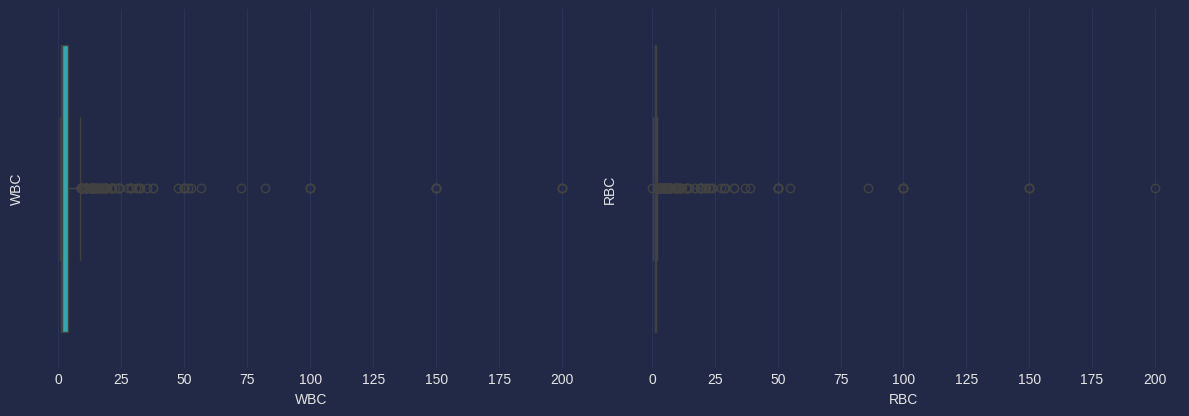

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['WBC'])
plt.ylabel('WBC')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['RBC'])
plt.ylabel('RBC')

plt.tight_layout()
plt.show()

## Histograms

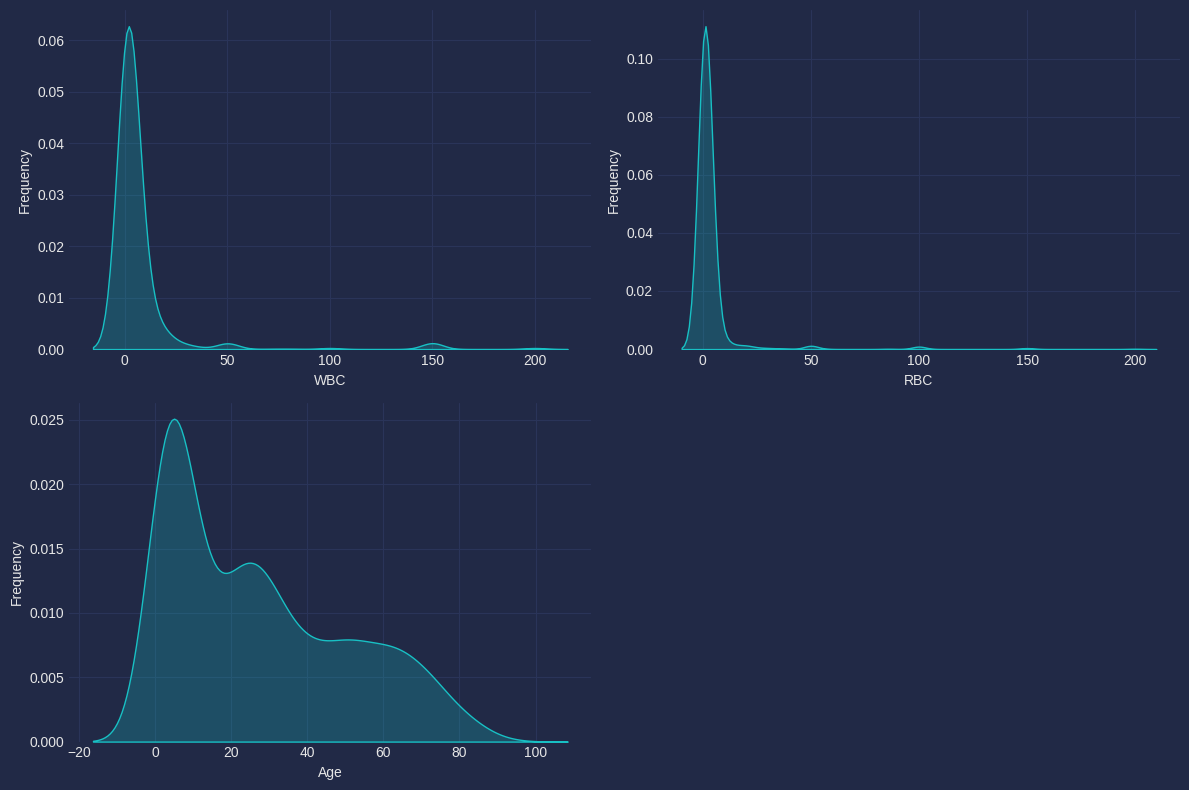

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.kdeplot(df['WBC'], fill = True)
plt.xlabel('WBC')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.kdeplot(df['RBC'], fill = True)
plt.xlabel('RBC')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.kdeplot(df['Age'], fill = True)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Bar Chart

<ipython-input-12-d16d02f96e23>:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=df['Gender'], hue=df['Gender'], order=pd.Series(df['Gender']).value_counts().index, palette=pal)
<ipython-input-12-d16d02f96e23>:9: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df['Color'], hue=df['Color'], order=pd.Series(df['Color']).value_counts().index, palette=pal)
<ipython-input-12-d16d02f96e23>:15: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(x=df['Transparency'], hue=df['Transparency'], order=pd.Series(df['Transparency']).value_counts().index, palette=pal)


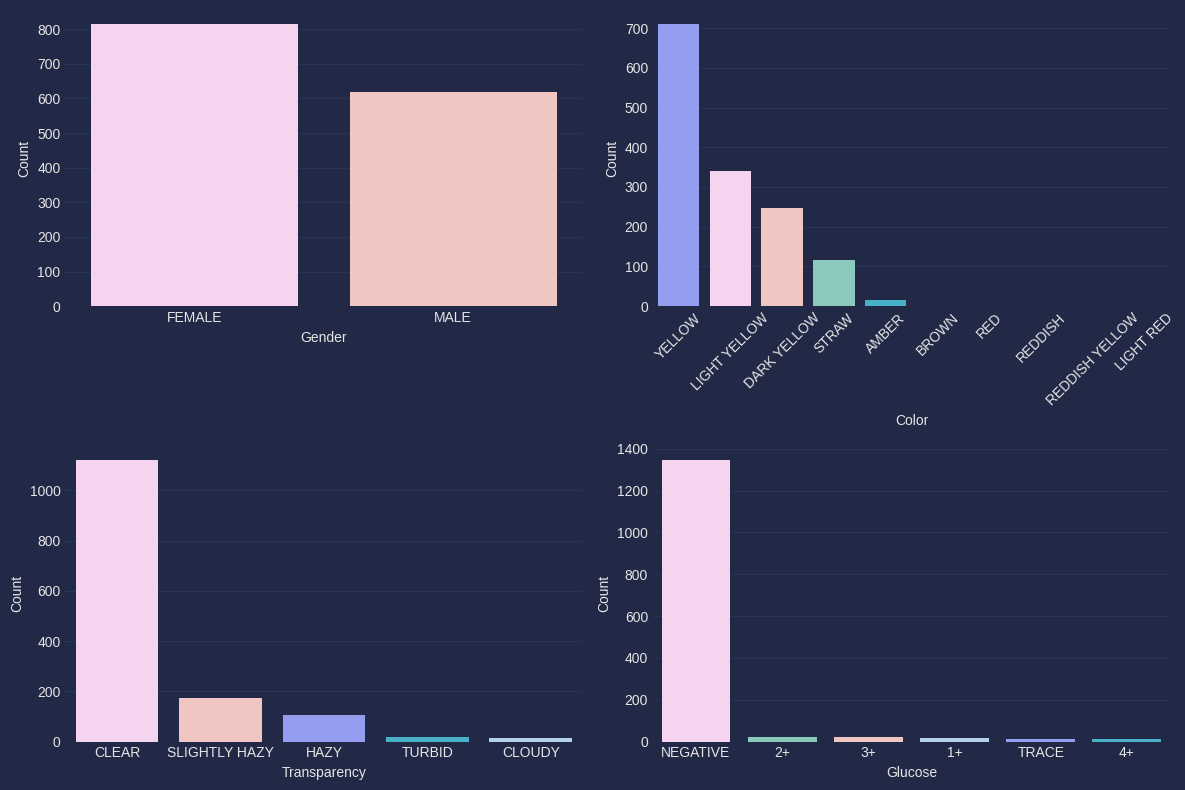

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x=df['Gender'], hue=df['Gender'], order=pd.Series(df['Gender']).value_counts().index, palette=pal)
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.countplot(x=df['Color'], hue=df['Color'], order=pd.Series(df['Color']).value_counts().index, palette=pal)
plt.xlabel('Color')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.countplot(x=df['Transparency'], hue=df['Transparency'], order=pd.Series(df['Transparency']).value_counts().index, palette=pal)
plt.xlabel('Transparency')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.countplot(x=df['Glucose'], hue=df['Glucose'], order=pd.Series(df['Glucose']).value_counts().index, palette=pal)
plt.xlabel('Glucose')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<ipython-input-15-8d73707eb39b>:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(x=df['Protein'], hue=df['Protein'], order=pd.Series(df['Protein']).value_counts().index, palette=pal)
<ipython-input-15-8d73707eb39b>:21: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df['Epithelial_Cells'], hue=df['Epithelial_Cells'], order=pd.Series(df['Epithelial_Cells']).value_counts().index, palette=pal)


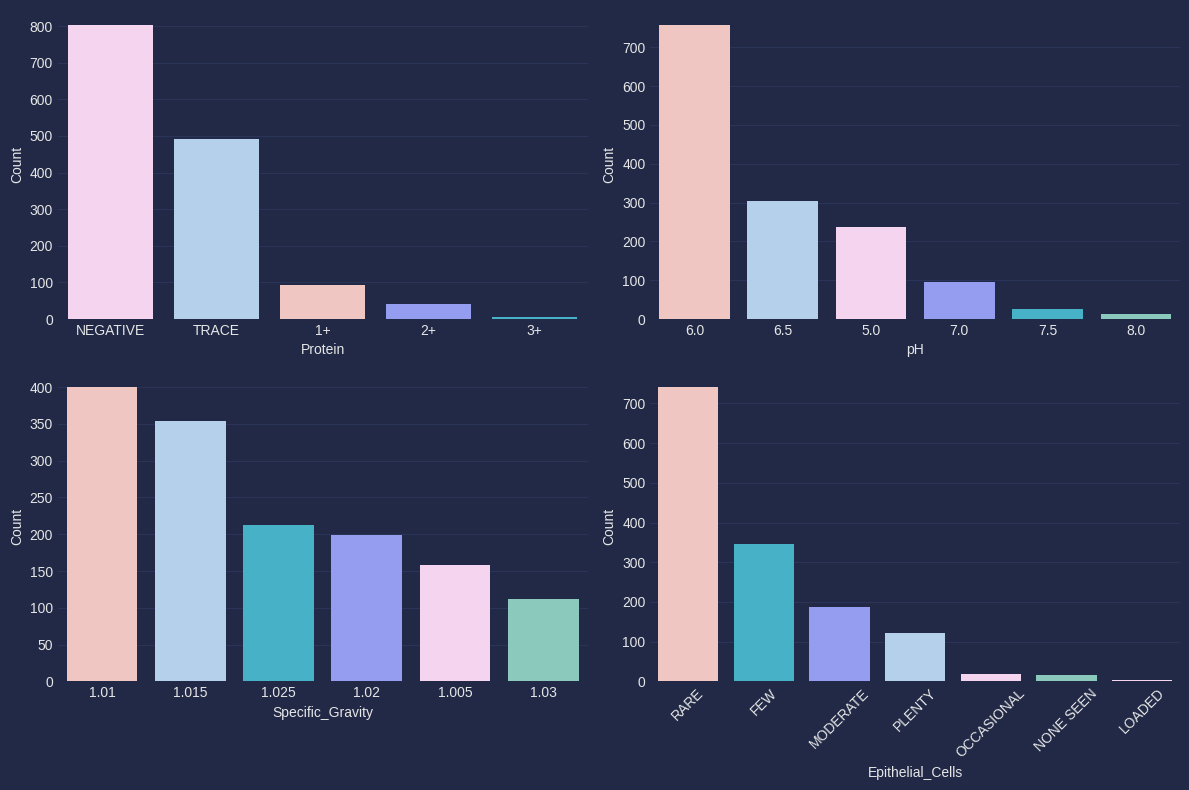

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x=df['Protein'], hue=df['Protein'], order=pd.Series(df['Protein']).value_counts().index, palette=pal)
plt.xlabel('Protein')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
ax = sns.countplot(x=df['pH'], hue=df['pH'], order=pd.Series(df['pH']).value_counts().index, palette=pal)
plt.xlabel('pH')
plt.ylabel('Count')
ax.legend([])

plt.subplot(2, 2, 3)
ax = sns.countplot(x=df['Specific_Gravity'], hue=df['Specific_Gravity'], order=pd.Series(df['Specific_Gravity']).value_counts().index, palette=pal)
plt.xlabel('Specific_Gravity')
plt.ylabel('Count')
ax.legend([])

plt.subplot(2, 2, 4)
sns.countplot(x=df['Epithelial_Cells'], hue=df['Epithelial_Cells'], order=pd.Series(df['Epithelial_Cells']).value_counts().index, palette=pal)
plt.xlabel('Epithelial_Cells')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<ipython-input-16-1769d91140b1>:19: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=df['Diagnosis'], hue=df['Diagnosis'], order=pd.Series(df['Diagnosis']).value_counts().index, palette=pal)


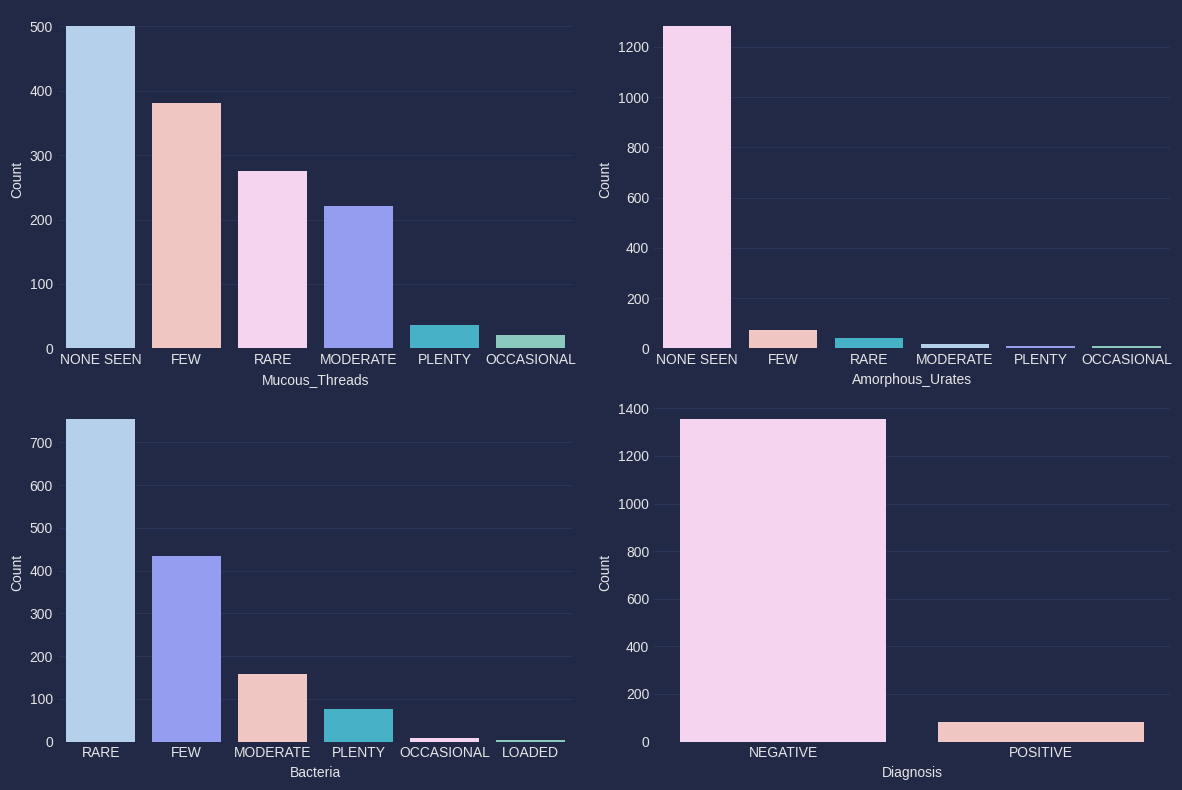

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x=df['Mucous_Threads'], hue=df['Mucous_Threads'], order=pd.Series(df['Mucous_Threads']).value_counts().index, palette=pal)
plt.xlabel('Mucous_Threads')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.countplot(x=df['Amorphous_Urates'], hue=df['Amorphous_Urates'], order=pd.Series(df['Amorphous_Urates']).value_counts().index, palette=pal)
plt.xlabel('Amorphous_Urates')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.countplot(x=df['Bacteria'], hue=df['Bacteria'], order=pd.Series(df['Bacteria']).value_counts().index, palette=pal)
plt.xlabel('Bacteria')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.countplot(x=df['Diagnosis'], hue=df['Diagnosis'], order=pd.Series(df['Diagnosis']).value_counts().index, palette=pal)
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Heatmap

In [ ]:
frequency_order = ['NONE SEEN', 'RARE', 'FEW', 'OCCASIONAL', 'MODERATE', 'PLENTY', 'LOADED']
color_order = ['LIGHT YELLOW', 'STRAW', 'AMBER', 'BROWN', 'DARK YELLOW', 'YELLOW', 'REDDISH YELLOW', 'REDDISH', 'LIGHT RED', 'RED']
opacity_order = ['CLEAR', 'SLIGHTLY HAZY', 'HAZY', 'CLOUDY', 'TURBID']
protein_glucose = ['NEGATIVE', 'TRACE', '1+', '2+', '3+', '4+']
diagnosis_order = ['NEGATIVE', 'POSITIVE']
gender_order = ['FEMALE', 'MALE']
pH_order = sorted(df['pH'].unique())
gravity_order = sorted(df['Specific_Gravity'].unique())

columns_to_transform = {
    'Epithelial_Cells': frequency_order,
    'Mucous_Threads': frequency_order,
    'Amorphous_Urates': frequency_order,
    'Bacteria': frequency_order,
    'Color': color_order,
    'Transparency': opacity_order,
    'Glucose': protein_glucose,
    'Protein': protein_glucose,
    'Diagnosis': diagnosis_order,
    'Gender': gender_order,
    'pH': pH_order,
    'Specific_Gravity': gravity_order

}

In [ ]:
trans_df = df.copy()

label_encoder = LabelEncoder()
for column, order_list in columns_to_transform.items():
    if order_list:
        label_encoder.fit(order_list)
        trans_df[column] = label_encoder.transform(trans_df[column])
    else:
        trans_df[column] = label_encoder.fit_transform(trans_df[column])

In [ ]:
not_scaled_column = trans_df.drop(columns=['Age', 'WBC', 'RBC'])
scaled_df = trans_df[['Age', 'WBC', 'RBC']]

scaler = RobustScaler()
scaled_data = scaler.fit_transform(scaled_df)
scaled_df = pd.DataFrame(scaled_data, columns=scaled_df.columns)

trans_df = pd.concat([scaled_df, not_scaled_column], axis=1)

In [ ]:
trans_df

,Age,WBC,RBC,Gender,Color,Transparency,Glucose,Protein,pH,Specific_Gravity,Epithelial_Cells,Mucous_Threads,Amorphous_Urates,Bacteria,Diagnosis
0,1.358974,0.166667,0.0,0,4,0,4,4,0,1,4,6,3,4,0
1,-0.358974,0.166667,0.0,1,2,3,4,0,0,5,6,0,0,2,0
2,-0.282051,0.000000,0.0,1,4,3,4,5,0,5,6,0,2,6,0
3,1.384615,1.666667,298.0,1,1,1,4,0,1,3,6,6,3,0,0
4,0.153846,0.333333,0.0,0,9,2,4,5,1,4,6,6,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,-0.576923,0.000000,-1.0,1,9,0,4,4,1,2,6,0,3,6,0
1431,0.487179,-0.166667,0.0,1,9,0,4,4,2,1,6,3,3,6,0
1432,0.615385,0.500000,0.0,0,2,0,4,5,1,5,2,2,3,6,0
1433,0.871795,-0.166667,0.0,0,2,0,4,5,0,5,5,5,3,0,0


<Axes: >

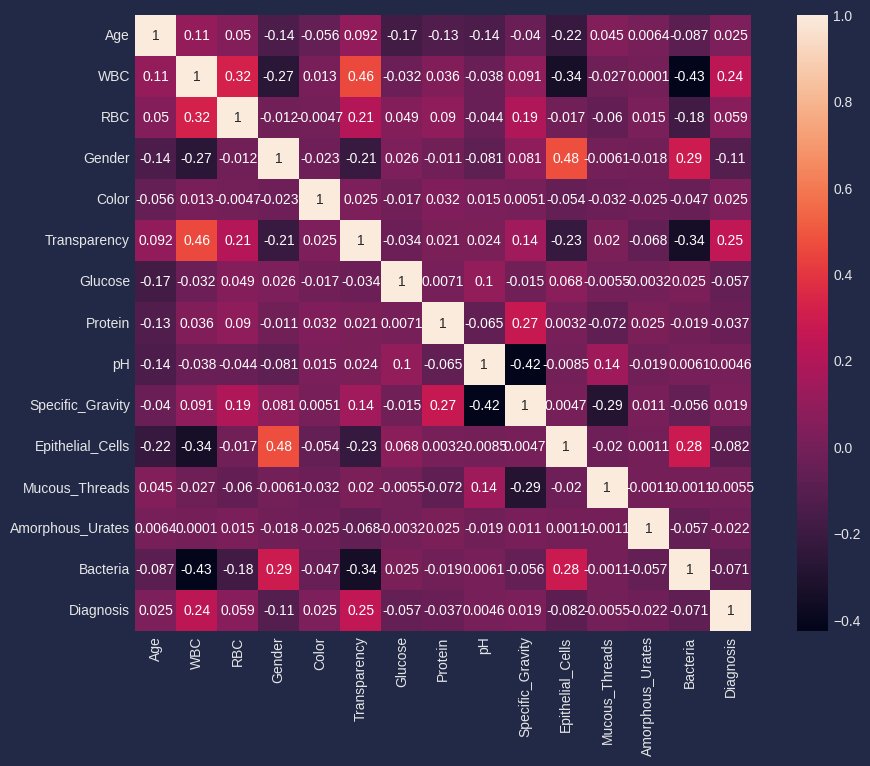

In [ ]:
corr_matrix = trans_df.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, square=True)

# $χ^{2}$ test

In [ ]:
independent_vars = ['Color',	'Transparency',	'Glucose',	'Protein',	'pH',	'Specific_Gravity', 'Epithelial_Cells',	'Mucous_Threads',	'Amorphous_Urates',	'Bacteria', 'Gender']
dependent_var = 'Diagnosis'
results = []

for var in independent_vars:
    contingency_table = pd.crosstab(df[dependent_var], df[var])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    results.append([var, chi2_stat, p_val, dof])

In [ ]:
print(tabulate(results, headers=['Variable', 'Chi-square stat', 'P-value', 'Degrees of freedom'], tablefmt='grid'))

+------------------+-------------------+-------------+----------------------+
| Variable         |   Chi-square stat |     P-value |   Degrees of freedom |
+==================+===================+=============+======================+
| Color            |         18.6699   | 0.0281506   |                    9 |
+------------------+-------------------+-------------+----------------------+
| Transparency     |        113.476    | 1.31996e-23 |                    4 |
+------------------+-------------------+-------------+----------------------+
| Glucose          |          9.22428  | 0.100446    |                    5 |
+------------------+-------------------+-------------+----------------------+
| Protein          |         19.3505   | 0.000670615 |                    4 |
+------------------+-------------------+-------------+----------------------+
| pH               |          0.955408 | 0.966082    |                    5 |
+------------------+-------------------+-------------+----------

In [ ]:
trans_df.to_csv('/content/drive/MyDrive/Work/Data/transformed_urinalysis_tests.csv', index=False)